# Análisis de Sentimientos

FinViz es un sitio web para obtener información sobre el mercado de valores. Desde ratios, indicadores técnicos hasta titulares de noticias y datos de formación de información privilegiada, para analizar acciones. Además, cuenta con información actualizada sobre el desempeño de cada sector, industria y cualquier índice bursátil importante.

En lugar de tener que revisar cada título para cada acción que le interese, podemos usar Python para analizar los datos de este sitio web y realizar un análisis de opinión (es decir, asignar una puntuación de opinión) para cada título antes de promediarlo durante un período de tiempo.

La idea es que el valor promedio puede brindar información valiosa para el sentimiento general de una acción para un día determinado (o una semana si decide promediar las noticias de una semana). 

## 1. Importar bibliotecas

Primero, importamos las bibliotecas que necesitamos para almacenar los datos. Se necesita `BeautifulSoup` para analizar datos de FinViz, mientras que se necesitan `requests` para obtener datos. `Pandas` se usa para almacenar los datos en DataFrames, mientras que `Matplotlib` se usa para trazar el sentimiento en un gráfico. Por último, la biblioteca `nltk.sentiment.vader` se utiliza para realizar análisis de sentimientos en los titulares de las noticias.

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# NLTK VADER biblioteca para análisis de sentimientos o minería de opinión:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Dirección web de las noticias:
finwiz_url = 'https://finviz.com/quote.ashx?t='

## 2. Guardar los datos de fecha, hora y titulares de noticias

todas las noticias se almacenan en una tabla con id = "news-table". He incluido dos filas de datos de la tabla, delimitadas por etiquetas `<tr> </tr>`. El código de una de las filas está encuadrado. Tenga en cuenta los datos de fecha y hora entre las primeras etiquetas `<td> </td>` del cuadro y el texto del título de noticias en las etiquetas `<a> </a>`. Vamos a extraer la fecha, la hora y el titular de la noticia para cada fila y realizar un análisis de opinión sobre el titular de la noticia.

El siguiente código muestra almacena la 'tabla de noticias' completa del sitio web de FinViz en un diccionario de Python, news_tables, para estas acciones: Amazon (AMZN), Tesla (TSLA) y Google (GOOG) (o más bien Alphabet, la compañía propietaria Google). Puede incluir tantos tickers como desee en la lista de tickers.

In [2]:
news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url = url,headers = {'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Leer el contenido del archivo en 'html'
    html = BeautifulSoup(response)
    # Encontrar 'news-table' en la Soup y cargarla en la variable 'news_table'
    news_table = html.find(id = 'news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

## 3. Imprimir los datos almacenados en news_tables (opcional)

Para tener una idea de lo que está almacenado en el diccionario news_tables para "AMZN". Siéntase libre de ejecutar el código a continuación, que itera a través de cada etiqueta `<tr> </tr>` (para las primeras 4 filas) para obtener los títulos entre las etiquetas <a> </a> y la fecha y hora entre las etiquetas `<td > </td>` etiquetas antes de imprimirlas. Este paso es opcional y es para su propio aprendizaje.

In [3]:
# Leer un solo día de titulares sobre 'AMZN' 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Leer el texto del elemento 'a' y guardarlo en 'link_text'
    a_text = table_row.a.text
    # Leer el texto del elemento 'td' y guardarlo en 'data_text'
    td_text = table_row.td.text
    # Imprimir el contenido de 'link_text' y 'data_text' 
    print(a_text)
    print(td_text)
    # Salir después de imprimir 4 filas de datos:
    if i == 3:
        break

Amazon Is Removing QAnon-Related Goods. Theyre Still Easy to Find.
Jan-12-21 02:36PM  
Trump TV Just Might Work, Analysts Say. The Demand Is There.
01:58PM  
Online Holiday 2020 Shopping Reaches New Record
01:44PM  
For better or worse, web infrastructure is not a public good
01:44PM  


## 4. Analice la fecha, la hora y los titulares de noticias en una lista de Python

El siguiente código es similar al anterior, pero esta vez analiza la fecha, la hora y los titulares en una lista de Python llamada parsed_news en lugar de imprimirla. El bucle if, else es necesario porque si miras los titulares de las noticias de arriba, solo las primeras noticias de cada día tienen la etiqueta 'fecha', el resto de las noticias solo tienen la etiqueta 'hora', así que tenemos que tener en cuenta esto .

In [4]:
parsed_news = []

# Iterar a través de las noticias:
for file_name, news_table in news_tables.items():
    
    # Iterar a través de todas las etiquetas tr en 'news_table'
    for x in news_table.findAll('tr'):
        # Leer el texto de cada tr y extraer el solo el texto que está dentro de cada etiqueta <a>
        text = x.a.get_text() 
        # dividir el texto de la etiqueta td en una lista
        date_scrape = x.td.text.split()
        # Si la longitud de 'date_scrape' es 1, cargar 'time' como el único elemento

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # sino, cargar 'date' como el primer elemento y 'time' como el segundo    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extraer el ticker del nombre de archivo, obtener la cadena hasta el primer '_'  
        ticker = file_name.split('_')[0]
        
        # Agregue ticker, fecha, hora y título como una lista a la lista 'parsed_news'
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AMZN',
  'Jan-12-21',
  '02:36PM',
  'Amazon Is Removing QAnon-Related Goods. Theyre Still Easy to Find.'],
 ['AMZN',
  'Jan-12-21',
  '01:58PM',
  'Trump TV Just Might Work, Analysts Say. The Demand Is There.'],
 ['AMZN',
  'Jan-12-21',
  '01:44PM',
  'Online Holiday 2020 Shopping Reaches New Record'],
 ['AMZN',
  'Jan-12-21',
  '01:44PM',
  'For better or worse, web infrastructure is not a public good'],
 ['AMZN',
  'Jan-12-21',
  '01:41PM',
  'I doubt it has legs: Why Parler has a weak antitrust claim against Amazon'],
 ['AMZN',
  'Jan-12-21',
  '01:08PM',
  'Regulatory scrutiny should apply to all content providers, including telecom companies: former Facebook executive'],
 ['AMZN',
  'Jan-12-21',
  '12:45PM',
  '3 Big Announcements That Will Make Roku Investors Richer'],
 ['AMZN',
  'Jan-12-21',
  '12:22PM',
  "Capitol Hill siege 'may be the beginning of the end of Big Tech': Scott Galloway"],
 ['AMZN',
  'Jan-12-21',
  '11:58AM',
  "If you don't own Amazon stock, 'you're actua

## 5. Análisis de sentimientos con Vader!

¡Ahora es el momento de realizar un análisis de sentimientos con nltk.sentiment.vader, finalmente! Almacenamos el ticker, la fecha, la hora y los titulares en un Pandas DataFrame, realizamos un análisis de sentimiento en los titulares antes de agregar una columna adicional en el DataFrame para almacenar las puntuaciones de sentimiento para cada titular.

In [5]:
import nltk
nltk.download('vader_lexicon')
    
# Instancia del analizador de intensidad de sentimiento
vader = SentimentIntensityAnalyzer()

# Establecer nombres de columna
columns = ['ticker', 'date', 'time', 'headline']

# Convertir la lista parsed_news en un DataFrame llamado 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterar a través de los titulares y obtener las puntuaciones de polaridad usando vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convertir la lista 'scores' de diccionario a un DataFrame
scores_df = pd.DataFrame(scores)

# Unir los DataFrames de las noticias y la lista de diccionarios
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convertir la columna de fecha de cadena de texto a datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jeremias/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2021-01-12,02:36PM,Amazon Is Removing QAnon-Related Goods. Theyre...,0.000,0.635,0.365,0.5574
1,AMZN,2021-01-12,01:58PM,"Trump TV Just Might Work, Analysts Say. The De...",0.130,0.870,0.000,-0.1280
2,AMZN,2021-01-12,01:44PM,Online Holiday 2020 Shopping Reaches New Record,0.000,0.562,0.438,0.4404
3,AMZN,2021-01-12,01:44PM,"For better or worse, web infrastructure is not...",0.357,0.454,0.188,-0.3830
4,AMZN,2021-01-12,01:41PM,I doubt it has legs: Why Parler has a weak ant...,0.335,0.559,0.106,-0.5719


Las primeras 5 filas del DataFrame del código anterior deberían verse así. La columna "compuesto" da las puntuaciones de sentimiento. Para puntuaciones positivas, cuanto mayor sea el valor, más positivo será el sentimiento. De manera similar, para las puntuaciones negativas, cuanto más negativo es el valor, más negativo es el sentimiento. Las puntuaciones van de -1 a 1.

## 6. Trazar un gráfico de barras de la puntuación de sentimiento para cada día

El siguiente código toma el promedio de las puntuaciones de opinión para todos los titulares de noticias recopilados durante cada fecha y lo traza en un gráfico de barras. También puede promediar las puntuaciones de cada semana para obtener el sentimiento general durante una semana. Tenga en cuenta que en algunos días sin titulares de noticias para una acción en particular, no habría puntuación de sentimiento.

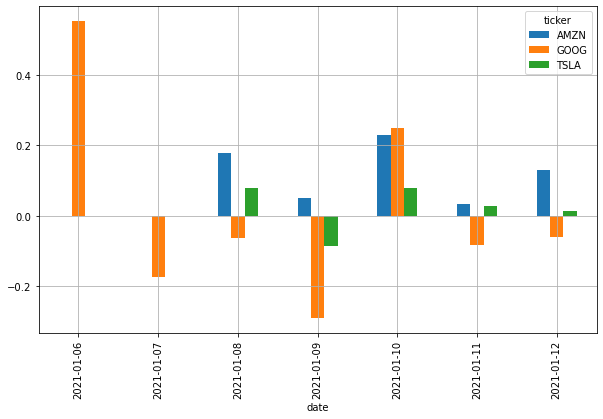

In [6]:
plt.rcParams['figure.figsize'] = [10, 6]

# Agrupar por las columnas fecha y ticker desde scored_news y calcular la media
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Desapilar el ticker de columna
mean_scores = mean_scores.unstack()

# Obtenga la sección transversal del compuesto en el eje 'columns'
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Trazar un gráfico de barras con pandas
mean_scores.plot(kind = 'bar')
plt.grid()